In [1]:
#import neurokit2 as nk
## enlever le commentaire pour neurokit2 pour l'utiliser
#import neurokit2 as nk
#import heartpy as hp
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime
import scipy as sci

In [2]:
## fonction pour vérifier si un fichier existe et qu'il n'est pas vide à partir du chemin du fichier
## retourne True si le fichier existe et n'est pas vide sinon retourne False
def is_non_zero_file(fpath):  
    return os.path.isfile(fpath) and os.path.getsize(fpath) > 0

In [1385]:
path_participant= '/home/f/Documents/TER/Participants/Nom Prenom/S8/Après/' # chemin du dossier pour les fichiers empatica

## Analyse AED

In [1386]:
df_aed= pd.read_csv(path_participant + 'EDA.csv', sep=';', header=None)

In [ ]:
df_tag= pd.read_csv(path_participant + 'tags.csv', header=None)

In [1363]:
# on stocke le temps de départ dans une variable
# on le convertit en même temps en format datetime pour le calcul des différences de temps après
start_date= pd.to_datetime(df_aed.loc[0], unit= 's')[0]
freq= df_aed.loc[1, 0] # on stocke la fréquence d'échantillonnage du fichier contenue à la deuxième ligne
df_aed= df_aed.loc[2:] # on supprime ces 2 première lignes du tableau pour ne garder que le signal brut

In [1347]:
df_tag

,0
0,2021-01-15 23:08:11.840
1,2021-01-15 23:18:48.860


### Si  deux tags

In [1348]:
df_tag[0]=pd.to_datetime(df_tag[0], unit= 's') # on convertir le fichier de tag en format datetime également
df_tag

,0
0,2021-01-15 23:08:11.840
1,2021-01-15 23:18:48.860


In [1349]:
# on calcule le temps écoulé en secondes entre le démarrage de la montre et le premier tag
timer_Tostart= (df_tag.loc[0,0] - start_date).total_seconds()
# on multiplie ce temps par la fréquence pour avoir l'index de la mesure où l'enregistrement qui nous intéresse COMMENCE
index_start= round(timer_Tostart) * freq
# on calcule le temps écoulé en secondes entre le démarrage de la montre et le dernier tag
timer_Tostop= (df_tag.iloc[-1, 0] - start_date).total_seconds()
# on multiplie ce temps par la fréquence pour avoir l'index de la mesure où l'enregistrement qui nous intéresse TERMINE
index_stop= round(timer_Tostop) * freq

### Pour les Après

In [1388]:
# on calcule le temps écoulé en secondes entre le démarrage de la montre et le premier tag

# on multiplie ce temps par la fréquence pour avoir l'index de la mesure où l'enregistrement qui nous intéresse COMMENCE
index_start= (len(df_aed) - 1) - (600 * freq)
# on calcule le temps écoulé en secondes entre le démarrage de la montre et le dernier tag

# on multiplie ce temps par la fréquence pour avoir l'index de la mesure où l'enregistrement qui nous intéresse TERMINE
index_stop= (len(df_aed) - 1) - (20 * freq)

### Pour les Avant

In [1380]:
# on calcule le temps écoulé en secondes entre le démarrage de la montre et le premier tag

# on multiplie ce temps par la fréquence pour avoir l'index de la mesure où l'enregistrement qui nous intéresse COMMENCE
index_start= (len(df_aed) - 1) - (300 * freq)
# on calcule le temps écoulé en secondes entre le démarrage de la montre et le dernier tag

# on multiplie ce temps par la fréquence pour avoir l'index de la mesure où l'enregistrement qui nous intéresse TERMINE
index_stop= (len(df_aed) - 1) - (20 * freq)

### Ensuite

In [1389]:
df_aed= df_aed.reset_index(drop= True)

In [1390]:
df_aed= df_aed.loc[index_start:index_stop] # on récupère donc uniquement le signal qui nous intéresse entre les 2 tags
df_aed

,0
103,18.258507
104,18.317430
105,18.345612
106,18.394287
107,18.418625
...,...
2419,22.836672
2420,22.844357
2421,22.850761
2422,22.861010


Pour récupérer les données comprises entre les tags, copier coller le code utilisé plus haut et l'adapter avec le nom des variables

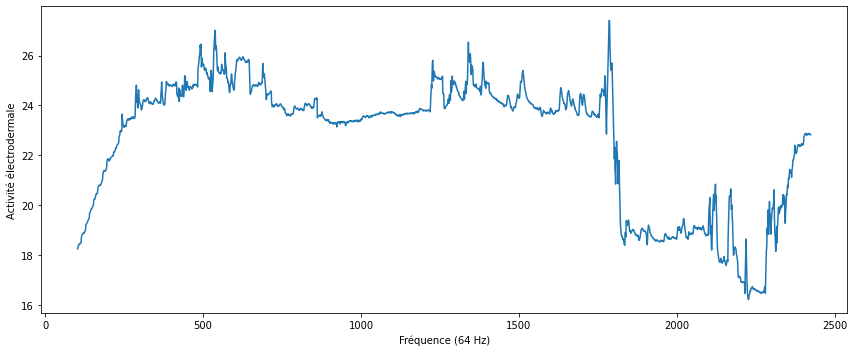

In [1391]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(df_aed[0])
ax.set_ylabel('Activité électrodermale')
ax.set_xlabel('Fréquence (64 Hz)')
fig.tight_layout()

In [1392]:
np.mean(df_aed)

0    22.661315
dtype: float64